In [27]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install numpy

You should consider upgrading via the 'C:\Users\4e6yPe4eK\PycharmProjects\geoML\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\4e6yPe4eK\PycharmProjects\geoML\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\4e6yPe4eK\PycharmProjects\geoML\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\4e6yPe4eK\PycharmProjects\geoML\venv\Scripts\python.exe -m pip install --upgrade pip' command.


### Импорт необходимых библиотек

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

### Работа с данными

#### Описание датасета

Директории train и test - данные для обучения и прогнозирования соответственно

Каждая директория содержит 10 файлов. 9 файлов вида B**.csv - значения каналов, файл NDVI.csv - рассчитанное значение индекса NDVI.

Каждый файл содержит 26 числовых столбцов со значениями каналов в k-ый день от начала года. Также данные для обучения содержат столбец culture с названием выращиваемой культуры.

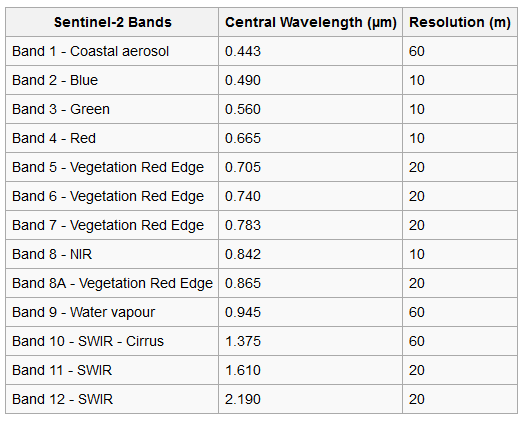

In [29]:
df_ndvi = pd.read_csv("train/NDVI.csv", sep=";", encoding="windows-1251")
df_ndvi.head(10)

,index,121,128,135,142,149,156,163,170,177,...,240,247,254,261,268,275,282,289,296,culture
0,0,0.188244,0.206521,0.232910,0.193433,0.263238,0.228108,NaN,0.273979,0.485290,...,0.527890,0.369459,0.307789,0.240027,0.235724,0.232962,0.222736,0.222434,0.176798,овощи
1,1,0.205408,0.191509,0.196319,0.234625,0.217135,NaN,NaN,0.265847,0.390356,...,0.642006,0.375903,0.261837,0.249050,0.246539,0.236201,0.195369,0.179459,0.185455,овощи
2,2,0.248486,0.227092,0.214698,0.189572,0.170360,0.193713,0.241287,NaN,0.255663,...,0.855819,0.848892,NaN,0.606488,0.390919,0.350582,NaN,0.264301,0.196965,овощи
3,3,0.287250,0.311047,0.466755,0.616326,0.737785,0.799452,0.846053,0.868648,0.882441,...,0.831719,0.815582,0.827515,0.763338,NaN,0.551148,0.464271,0.384087,0.385868,залежь
4,4,0.311994,0.416566,0.583125,0.704017,0.780974,0.853372,0.900345,0.930666,NaN,...,0.859423,0.873036,0.844018,0.830362,0.624388,0.706048,0.582176,0.500958,0.420562,залежь
5,5,0.260177,0.241893,0.281690,0.255721,0.203901,0.252407,0.335413,0.357807,0.567287,...,0.521328,0.417956,0.358768,0.339409,NaN,0.256801,0.418037,0.417092,0.220723,овощи
6,6,0.243982,0.222244,0.225098,0.199966,0.237663,0.260808,0.225740,0.253234,0.381375,...,0.874592,0.510040,0.203177,0.231610,0.249093,0.248608,0.230990,NaN,0.201148,овощи
7,7,0.231079,0.275978,0.259259,0.224081,0.277293,0.311031,0.278044,0.317316,NaN,...,0.898339,NaN,0.739521,0.554141,0.417877,0.303910,NaN,NaN,0.258387,соя
8,8,0.242375,0.179980,0.207202,NaN,0.195266,0.184495,0.191578,0.215180,0.261571,...,0.863774,0.493106,0.080757,0.243112,0.214876,0.228132,0.206571,0.216145,0.162141,кукуруза
9,9,0.191610,0.207657,0.226461,0.247085,0.180790,0.240888,0.252291,0.260643,0.419902,...,0.781001,0.437093,0.218712,0.241072,0.254690,0.181041,0.210330,0.157217,0.220371,овощи


In [30]:
df_ndvi = df_ndvi.drop(columns=["index"])  # Удалим столбец с индексами, в данном примере они не понадобятся

In [31]:
df_ndvi.isna().sum()  # Проверим наличие пустых значений

121        610
128        545
135        583
142        578
149        587
156        583
163        601
170        566
177        608
184        579
191        604
198        632
205        572
212        591
219        611
226        589
233        575
240        591
247        555
254        595
261        548
268        583
275        532
282        601
289        596
296        572
culture      0
dtype: int64

##### Построим усреднённый график значений NDVI культур
> По этому графику можно сделать выводы какие культуры похожи своими графиками, помогает заметить выбросы и ещё многое другое. Далее Вы можете использовать это для модификации модели.

['овощи', 'залежь', 'соя', 'кукуруза', 'зерновые', 'многолетние травы']


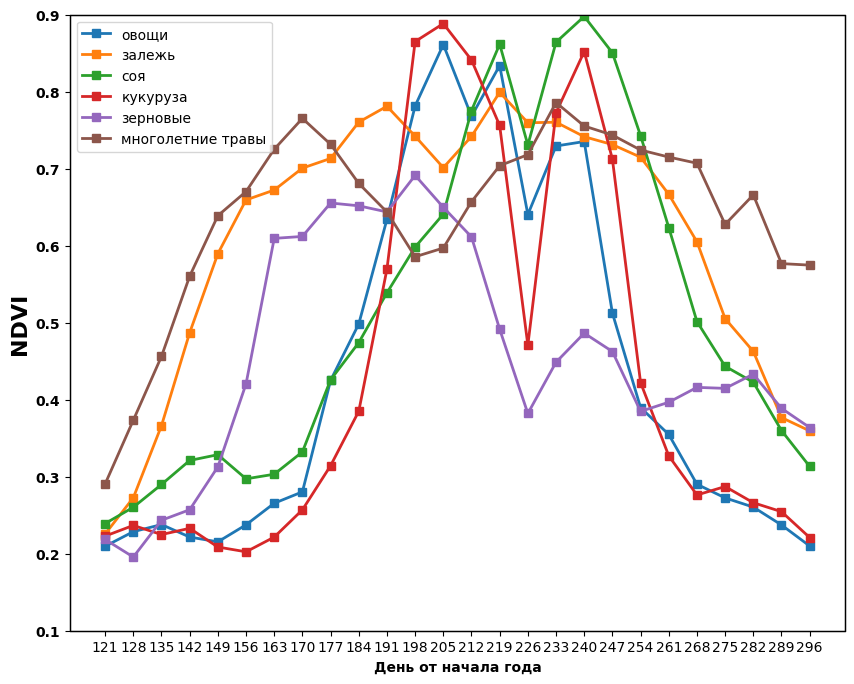

In [32]:
cul = list(df_ndvi['culture'].unique().tolist())
print(cul)
fig, ax = plt.subplots(figsize=(10,8))

plt.yticks(fontsize=10)

ax.set_xlabel('День от начала года',fontsize = 10,fontweight="bold")
ax.set_ylabel('NDVI',fontsize = 16,fontweight="bold")
ax.patch.set_edgecolor('black')

ax.patch.set_linewidth(1)
plt.ylim([0.1, 0.9])


xx = ['121', '128', '135', '142', '149', '156', '163', '170', '177', '184', '191', '198', '205', '212', '219', '226', '233', '240', '247', '254', '261', '268', '275', '282', '289', '296']
colors = plt.cm.coolwarm(np.array(len(cul)))
for i in range(len(cul)):
    p = df_ndvi.loc[(df_ndvi['culture'] == cul[i])].drop(columns=['culture']).mean()
    ax.plot(xx, p.values.tolist(), label=cul[i], linestyle = '-', marker = 's', markersize = 6, linewidth = 2)
plt.yticks(size=10, fontweight="bold")
leg = ax.legend(fontsize=10, loc ='upper left')

plt.show()

#### Сконструируем новые признаки

Иногда при помощи конструирования новых признаков на основе существующих можно добиться улучшения эффективности модели.

Попробуем сконструировать новый признак по формулам:

$NDWI = \frac{NIR - SWIR}{NIR + SWIR}$

<br>

$NEW\_FEATURE = NDVI * NDWI$

In [33]:
df_nir = pd.read_csv("train/B8A.csv", sep=';', encoding="windows-1251").drop(columns=["index"])  # B8A - канал со значениями NIR
df_swir = pd.read_csv("train/B12.csv", sep=';', encoding="windows-1251").drop(columns=["index"])  # B12 - канал со значениями SWIR

In [36]:
df_features = df_ndvi.copy()  # Создадим таблицу для используемых признаков

for day in xx:  # Переберем все дни и создадим новый признак для каждого дня
    df_features[f"{day}_NDWI"] = (df_nir[day] - df_swir[day]) / (df_nir[day] + df_swir[day])
    df_features[f"{day}_NEW"] = df_ndvi[day] * df_features[f"{day}_NDWI"]

df_features.tail()

#### Сформируем датасет
>
> X - матрица признаков
> Y - матрица ответов

* При формировании матрицы ответов используем методику OneHotEncoding. Столбец ответа (названия культуры) конвертируется в несколько столбцов вида "Это культура K?". В каждой строке только в одном из столбцов есть значение 1 - показатель принадлежности к классу


+ Обе матрицы разделяются на две части - train и test. Это делается для того, чтобы при обучении модель оценивалась на других данных и не "заучивала" данные. Без этого на "боевых" данных модель будет работать плохо.

In [37]:
encoder = OneHotEncoder()

x = df_features.drop(columns=["culture"])
y = pd.DataFrame(encoder.fit_transform(df_features[['culture']]).toarray(), columns=encoder.get_feature_names_out(['culture']))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Обучение моделей

#### 1. Random Forest

Алгоритм случайного леса (Random Forest) — универсальный алгоритм машинного обучения, суть которого состоит в использовании ансамбля решающих деревьев. Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается. Также это один из немногих алгоритмов, который можно использовать в абсолютном большинстве задач.

Нормализация данных является важным шагом в предобработке данных для машинного обучения. Она включает в себя масштабирование значений признаков в определенный диапазон. Это помогает увеличить численную стабильность и уравнить влияние признаков

In [38]:
normalizer = Normalizer()

In [39]:
model = RandomForestClassifier()

In [40]:
pipeline = Pipeline([
    ("norm", normalizer),
    ("model", model)
])
#  Pipeline - инструмент для объединения последовательности нескольких обработок.

In [41]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('norm', Normalizer()), ('model', RandomForestClassifier())])

In [42]:
# Чтобы сохранить модель и не обучать её заново, можно сохранить её в файл следующим образом:
# with open("model.pkl", 'wb') as file:
#     pickle.dump(pipeline, file)

# Код для загрузки модели из файла:
# with open('model.pkl', 'rb') as file:
#     pipeline = pickle.load(file)

In [43]:
ans = pipeline.predict(x_test)  # Получаем в каждой строке принадлежность к каждому классу
pred_ans = np.zeros_like(ans).astype("int32")
pred_ans[np.arange(len(ans)), ans.argmax(1)] = 1  # Расставляем единички в столбцах с максимумом

In [44]:
print(classification_report(y_test, pred_ans))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00        17
           3       0.89      0.96      0.92        25
           4       1.00      0.89      0.94        18
           5       0.94      0.79      0.86        19

   micro avg       0.91      0.91      0.91       109
   macro avg       0.93      0.90      0.91       109
weighted avg       0.92      0.91      0.91       109
 samples avg       0.91      0.91      0.91       109



#### Запишем спрогнозированные ответы

In [45]:
df_ndvi_test = pd.read_csv("test/NDVI.csv", sep=";", encoding="windows-1251").drop(columns=["index"])
df_nir_test = pd.read_csv("test/B8A.csv", sep=';', encoding="windows-1251").drop(columns=["index"])
df_swir_test = pd.read_csv("test/B12.csv", sep=';', encoding="windows-1251").drop(columns=["index"])
df_ndvi_test = df_ndvi_test.dropna()
df_swir_test = df_swir_test.dropna()
df_nir_test = df_nir_test.dropna()
# Удалим отсутствующие значение(возможно, их стоит заменять)

df_features_test = df_ndvi_test.copy()
for day in xx:
    df_features_test[f"{day}_NDWI"] = (df_nir_test[day] - df_swir_test[day]) / (df_nir_test[day] + df_swir_test[day])
    df_features_test[f"{day}_NEW"] = df_ndvi_test[day] * df_features_test[f"{day}_NDWI"]

In [46]:
x = df_features_test.drop(columns=["culture"])

ans_test = pipeline.predict(x)
pred_ans_test = np.zeros_like(ans_test).astype("int32")
pred_ans_test[np.arange(len(ans_test)), ans_test.argmax(1)] = 1

KeyError: "['culture'] not found in axis"

Формат ответа:
Первая строка состоит из одного слова "culture"
На каждой следующей строке названия культуры для спрогнозированных данных в том же порядке, что и тестовых данных.

In [ ]:
with open("predicted.csv", encoding="windows-1251", mode="w") as file:  # Запись ответов в файл
    file.write("culture\n")
    for row in encoder.inverse_transform(pred_ans_test):
        file.write(f"{row[0]}\n")